In [17]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import pandas as pd
import shutil
import torch
import torch.nn as nn


In [18]:
clicker = False
if clicker:
    cyberzoo_green_width = 7
    cyberzoo_green_length = 7
    z_min = 0

    corner_coordinates = {
                'A': {'x' : cyberzoo_green_width/2,
                    'y' : cyberzoo_green_length/2,
                    'z' : z_min},
                'B': {'x' : -cyberzoo_green_width/2,
                    'y' : cyberzoo_green_length/2,
                    'z' : z_min},
                'C': {'x' : -cyberzoo_green_width/2,
                    'y' : -cyberzoo_green_length/2,
                    'z' : z_min},
                'D': {'x' : cyberzoo_green_width/2,
                    'y' : -cyberzoo_green_length/2,
                    'z' : z_min}
            }


    # Initialize global variables
    point_clicked_img = None
    img = None

    # Callback function for mouse events
    def click_event(event, x, y, flags, param):
        global point_clicked_img, img
        if event == cv2.EVENT_LBUTTONDOWN:  # Left mouse button clicked
            point_clicked_img = ((x, y))  # Append the (x, y) tuple to the list
            print(f'Coordinates: ({x}, {y})')  # Print coordinates of the click
            cv2.circle(img, (x, y), 5, (255, 0, 0), -1)  # Mark the clicked point with a blue circle
            
            cv2.imshow('image', img)  # Show the image with the marked point
        return point_clicked_img

    def clicker_call(image_path):
        global img, point_clicked_img
        # Load your image
        img = cv2.imread(image_path)
        # Rotate the image 90 counter
        img = cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)
        # Make image brighter
        img = cv2.convertScaleAbs(img, alpha=1.5, beta=0)
        cv2.imshow('image', img)

        # Set mouse callback function for 'image' window
        cv2.setMouseCallback('image', click_event)

        # What to press 'a' 'b' 'c' or 'd' and go into a if statement
        
        # Back is the closed way opposite the netted wall
        # A : right back
        # B : right front
        # C : left front
        # D : left back

        k = cv2.waitKey(0)
        if k == ord('a'):
            # Cyberzoo coordinate a
            X = corner_coordinates['A']['x']
            Y = corner_coordinates['A']['y']
            Z = corner_coordinates['A']['z']
            point_clicked_xyz = (X, Y, Z)
            corner_label = 'A'
        if k == ord('b'):
            # Cyberzoo coordinate b
            X = corner_coordinates['B']['x']
            Y = corner_coordinates['B']['y']
            Z = corner_coordinates['B']['z']
            point_clicked_xyz = (X, Y, Z)
            corner_label = 'B'

        if k == ord('c'):
            # Cyberzoo coordinate c
            X = corner_coordinates['C']['x']
            Y = corner_coordinates['C']['y']
            Z = corner_coordinates['C']['z']
            point_clicked_xyz = (X, Y, Z)
            corner_label = 'C'
        if k == ord('d'):
            # Cyberzoo coordinate d
            X = corner_coordinates['D']['x']
            Y = corner_coordinates['D']['y']
            Z = corner_coordinates['D']['z']
            point_clicked_xyz = (X, Y, Z)
            corner_label = 'D'  

        cv2.waitKey(0)  # Wait for a key press to exit
        cv2.destroyAllWindows()  # Close all OpenCV windows

        # Optionally, print all clicked points
        print('clicked point:', point_clicked_img)

        return point_clicked_img, point_clicked_xyz, corner_label


    images_path = r"C:\Users\Jonathan van Zyl\Documents\GitHub\paparazzi\Data_gitignore\AE4317_2019_datasets\cyberzoo_poles_panels\20190121-140205"
    file_path = "Data_gitignore/AE4317_2019_datasets/cyberzoo_poles_panels/20190121-140303.csv"
    frame_files = sorted(os.listdir(images_path))

    no_images = len(frame_files)
    max_iters = 200
    steps_between_image = int(no_images/max_iters)
    stop_iter = steps_between_image*max_iters

    print(0, stop_iter, steps_between_image)
    # Open the CSV file in write mode
    with open('outputdos.csv', 'w', newline='') as file:
        writer = csv.writer(file)
        # Write the header
        writer.writerow(["image_name", "image_x", "image_y", "x", "y", "z", "corner_label"])
        for i in range(0, stop_iter, steps_between_image):
            
            image_path = os.path.join(images_path, frame_files[i])

            point_clicked_img, point_clicked_xyz, corner_label = clicker_call(image_path)

            print('point clicked image:', point_clicked_img)
            print('point clicked xyz:', point_clicked_xyz)

            image_name = frame_files[i]

            # Write the data to the CSV file
            writer.writerow([image_name, point_clicked_img[0], point_clicked_img[1], point_clicked_xyz[0], point_clicked_xyz[1], point_clicked_xyz[2], corner_label])

            # Stop if q is pressed
            k = cv2.waitKey(0)
            if k == ord('q'):
                break

In [19]:
# Already rotate everything to the camera frame
from projection_functions import Camera, StateVector, VideoFeed
# Loop over all jpgs
'''
image_name,time,x_pos,y_pos,z_pos,theta,psi,phi
100049163.jpg,100.049163,0.078125,-1.066406,-1.003906,-0.003436465540194465,0.4858215344598055,0.008807465540194464
100282495.jpg,100.282495,0.179688,-1.0,-0.9766836186770428,-0.004883,0.4856035953307393,0.008781404669260704
100482507.jpg,100.482507,0.25,-0.949219,-0.96875,-0.007677832480032774,0.485107,0.005017167519967227
100715833.jpg,100.715833,0.339844,-0.886719,-0.960938,-0.007324,0.485107,0.005050384300061657
100982494.jpg,100.982494,0.457031,-0.808594,-0.960938,-0.009118506195596517,0.484863,0.0028570123911930327
'''
# read the csv file: StateVector.csv and extract


def apply_camera_model(predicted_params, points_3d, index):
    file_path = r"C:\Users\Jonathan van Zyl\Documents\GitHub\paparazzi\COMPUTERVISIONSIM\Projection\Images\StateVector.csv"
    image_path = r"C:\Users\Jonathan van Zyl\Documents\GitHub\paparazzi\COMPUTERVISIONSIM\Projection\Images"

    
    points_2d, time = apply_camera_model_sub(index, points_3d, file_path, image_path, predicted_parameters)

    return points_2d, time

def own_fisheye_project(predicted_parameters, points3d_camera):
    # Unpack predicted parameters
        predicted_parameters = predicted_parameters.unsqueeze(0)
        f_x, f_y, c_x, c_y, k1, k2, k3, p_1 = predicted_parameters[0]
        X = points3d_camera[0]
        Y = points3d_camera[1]
        Z = points3d_camera[2]

        a = X / Z
        b = Y / Z
        r = np.sqrt(a**2 + b**2)


        theta = np.arctan(r)
        theta_d = theta * (1 + k1 * theta**2 + k2 * theta**4 + k3 * theta**6)
        x = theta_d/r * a
        y = theta_d/r * b


        u = f_x * x + c_x
        v = f_y * y + c_y

        # Stack the 2D points into a single tensor
        points_2d = torch.stack([u, v], dim=-1)

        img_width = 240
        img_height = 520

        # Normalise the points
        points_2d[0] = points_2d[0] / img_width
        points_2d[1] = points_2d[1] / img_height

        return points_2d

def point3DDrone_to_point3DCamera(point_3D_Drone):
    '''
    Drone Frame (a/c frame):
    - X : Forward
    - Y : Right (maybe left)
    - Z : Down

    Camera Frame:
    - X : Right
    - Y : Down
    - Z : Forward
    '''
    
    X_drone = point_3D_Drone[0][0]
    Y_drone = point_3D_Drone[1][0]
    Z_drone = point_3D_Drone[2][0]
    
    X_camera = Y_drone
    Y_camera = Z_drone
    Z_camera = X_drone

    point_3D_Camera = np.array([X_camera, Y_camera, Z_camera])

    return point_3D_Camera


def apply_camera_model_sub(index, points_3d_World, file_path, image_path, predicted_parameters):
    # Create a state vector object
    state_vector = StateVector(file_path)

    # Create a camera object
    camera_front = Camera()

    # Load the image
    images = VideoFeed(image_path)

    # Rotate the image
    images.image_rotate_90_counter()
    images.index = index
    images.image_current = images.image_read(index)
    images.image_rotate_90_counter()



    time = images.find_time()
    # update the camera object
    camera_front.update_state_vector(state_vector, time)


    # Create the projection
    # Project the cyberzoo points
    # Convert points3d_cyberzoo elements to a numpy array of type float32 and reshape to have 3 channels
    points_3d_World = np.array(points_3d_World, dtype=np.float32).reshape(-1, 3)
    point3D_Drone = camera_front.point3DWorld_to_point3D_Drone(points_3d_World)
    point3D_Camera = point3DDrone_to_point3DCamera(point3D_Drone)

    # Project the points
    points_2d = own_fisheye_project(predicted_parameters, point3D_Camera)

    img_width = 240
    img_height = 520

    # Normalise the points
    points_2d[0] = points_2d[0] / img_width
    points_2d[1] = points_2d[1] / img_height
    

    return points_2d, time


In [20]:
class CameraParameterEstimator(nn.Module):
    def __init__(self, initial_params):
        super(CameraParameterEstimator, self).__init__()
        #self.fc1 = nn.Linear(3, 512)  # 3 input features (X_c, Y_c, Z_c)
        #self.fc2 = nn.Linear(512, 256)
        #self.fc3 = nn.Linear(256, 128)
        #self.fc4 = nn.Linear(128, 64)
        #self.fc5 = nn.Linear(64, 32)
        self.fc1 = nn.Linear(3, 8)  # 3 input features (X_c, Y_c, Z_c)
        self.fc2 = nn.Linear(8, 32)
        self.fc6 = nn.Linear(32, 8)  # 8 output features (f_x, f_y, c_x, c_y, k1, k2, k3, p_1)

        # Initialize fc5 weights with initial_params
        with torch.no_grad():
            self.fc6.bias = nn.Parameter(torch.tensor(initial_params))
        

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        #x = torch.relu(self.fc3(x))
        #x = torch.relu(self.fc4(x))
        #x = torch.relu(self.fc5(x))
        output = self.fc6(x)

        # Apply custom transformation to the last five outputs so they are between -0.1 and 0.1
        #output[:, 4:] = 0.4 * torch.sigmoid(output[:, 4:]) - 0.1

        # Apply custom transformation to first four outputs so are between 0 and 200, 200 added in camera model
        #output[:, :4] = 500 * torch.sigmoid(output[:, :4])
        
        
        return output

In [21]:
K_initial_guess = np.array([[323.94986777, 0, 265.6212057 ],
                  [ 0, 324.58989285, 213.41963136],
                  [ 0, 0, 1 ]])
        
D_initial_guess = np.array([[-0.03146083],
                  [-0.03191633],
                  [ 0.05678013],
                  [-0.04003636]])

# initial_params : [f_x, f_y, c_x, c_y, k1, k2, k3, p_1, p_2]
f_x = K_initial_guess[0, 0]
f_y = K_initial_guess[1, 1]
c_x = K_initial_guess[0, 2]
c_y = K_initial_guess[1, 2]
k1, k2, k3, p_1= D_initial_guess
initial_params = [f_x, f_y, c_x, c_y, k1[0], k2[0], k3[0], p_1[0]]

In [22]:

# Load x y from the csv file
points3D_World = np.genfromtxt('output.csv', delimiter=',', skip_header=1, usecols=(3, 4, 5)) # (x, y, z) : (N, 3)

input_3d_points = torch.tensor(points3D_World, dtype=torch.float32)

TXYZa = np.genfromtxt('output.csv', delimiter=',', skip_header=1, usecols=(0, 1, 2, 3), dtype=('U10', 'f8', 'f8', 'f8'))

'''
time_array = [100049163.0, 100282495.0, 100482507.0, 100715833.0, 100982494.0, 101215830.0, 101449184.0, 101682492.0, 101915820.0, 102149155.0, 102382486.0, 102615813.0, 102849149.0, 103082474.0, 103315832.0, 103549134.0, 103782482.0, 103982472.0, 104215805.0, 104449137.0, 104682471.0, 104915799.0, 105149136.0, 105382468.0, 105615793.0, 105849117.0, 106049124.0, 106282449.0, 106515776.0, 106715785.0, 106949116.0, 107182448.0, 107415764.0, 107649095.0, 107882434.0, 108115758.0, 108349084.0, 108582419.0, 108815749.0, 109049081.0, 109282416.0, 109515746.0, 109749075.0, 109949080.0, 110182409.0, 110449070.0, 110649074.0, 110882428.0, 111115735.0, 111349063.0, 111549065.0, 111782398.0, 112015728.0, 112282388.0, 112515718.0, 112749047.0, 112949055.0, 113182384.0, 113449057.0, 60582822.0, 60849474.0, 61082806.0, 61316162.0, 61549464.0, 61749486.0, 61982804.0, 62216131.0, 62449470.0, 62682793.0, 62916121.0, 63116128.0, 63349460.0, 63582791.0, 63816116.0, 64016121.0, 64249472.0, 64482789.99999999, 64716106.0, 64949444.0, 65182767.0, 65416095.0, 65649432.00000001, 65882758.99999999, 66116086.99999999, 66349421.00000001, 66582829.00000001, 66849431.99999999, 67082766.00000001, 67316096.0, 67582755.0, 67782767.0, 68016093.0, 68249423.0, 68482746.0, 68716091.0, 68949420.0, 69182748.0, 69416070.0, 69616081.0, 69849411.0, 70082741.0, 70349401.0, 70582738.0, 70816067.0, 71016067.0, 71249399.0, 71482721.0, 71716069.0, 71949399.0, 72216067.0, 72482714.0, 72716061.0, 72949406.0, 73149383.0, 73382713.0, 73649375.0, 73882714.0, 74149368.0, 74349374.0, 74582713.0, 74849368.0, 75082704.0, 75316029.0, 75549355.0, 75816027.0, 76049354.0, 76282685.0, 76549347.0, 76749356.0, 77016019.0, 77249352.0, 77516007.0, 77716014.0, 77949344.0, 78149345.0, 78382680.0, 78616008.0, 78849330.0, 79082666.0, 79316008.0, 79549334.0, 79782666.0, 80049322.0, 80249343.0, 80482671.0, 80749322.0, 80982655.0, 81215978.0, 81449324.0, 81715974.0, 81915980.0, 82149308.0, 82415970.0, 82615978.0, 82882636.0, 83115963.0, 83349296.0, 83549303.0, 83749299.0, 83982634.0, 84215967.0, 84449293.0, 84649296.0, 84882627.0, 85115956.0, 85349288.0, 85549284.0, 85782616.0, 86015974.0, 86249290.0, 86482617.0, 86682611.0, 86915940.0, 87149268.0, 87382599.0, 87615937.0, 87849266.0, 88049267.0, 88282598.0, 88515921.0, 88749255.0, 88982608.0, 89215917.0, 89449255.0, 89649257.0, 89882587.0, 90115924.0, 90349255.0, 90582579.0, 90815914.0, 91049241.0, 91282568.0, 91515901.0, 91715908.0, 91949236.0, 92182569.0, 92415908.0, 92615903.0, 92849241.0, 93082557.0]
Now need to sort the TXYZ array by time_array

TXYZ snippet : [('100049163.', 226., 156.,  3.5) ('100282495.', 231., 155.,  3.5)
 ('100482507.', 231., 156.,  3.5) ('100715833.', 227., 157.,  3.5)

'''

time_arrays = [100049163.0, 100282495.0, 100482507.0, 100715833.0, 100982494.0, 101215830.0, 101449184.0, 101682492.0, 101915820.0, 102149155.0, 102382486.0, 102615813.0, 102849149.0, 103082474.0, 103315832.0, 103549134.0, 103782482.0, 103982472.0, 104215805.0, 104449137.0, 104682471.0, 104915799.0, 105149136.0, 105382468.0, 105615793.0, 105849117.0, 106049124.0, 106282449.0, 106515776.0, 106715785.0, 106949116.0, 107182448.0, 107415764.0, 107649095.0, 107882434.0, 108115758.0, 108349084.0, 108582419.0, 108815749.0, 109049081.0, 109282416.0, 109515746.0, 109749075.0, 109949080.0, 110182409.0, 110449070.0, 110649074.0, 110882428.0, 111115735.0, 111349063.0, 111549065.0, 111782398.0, 112015728.0, 112282388.0, 112515718.0, 112749047.0, 112949055.0, 113182384.0, 113449057.0, 60582822.0, 60849474.0, 61082806.0, 61316162.0, 61549464.0, 61749486.0, 61982804.0, 62216131.0, 62449470.0, 62682793.0, 62916121.0, 63116128.0, 63349460.0, 63582791.0, 63816116.0, 64016121.0, 64249472.0, 64482789.99999999, 64716106.0, 64949444.0, 65182767.0, 65416095.0, 65649432.00000001, 65882758.99999999, 66116086.99999999, 66349421.00000001, 66582829.00000001, 66849431.99999999, 67082766.00000001, 67316096.0, 67582755.0, 67782767.0, 68016093.0, 68249423.0, 68482746.0, 68716091.0, 68949420.0, 69182748.0, 69416070.0, 69616081.0, 69849411.0, 70082741.0, 70349401.0, 70582738.0, 70816067.0, 71016067.0, 71249399.0, 71482721.0, 71716069.0, 71949399.0, 72216067.0, 72482714.0, 72716061.0, 72949406.0, 73149383.0, 73382713.0, 73649375.0, 73882714.0, 74149368.0, 74349374.0, 74582713.0, 74849368.0, 75082704.0, 75316029.0, 75549355.0, 75816027.0, 76049354.0, 76282685.0, 76549347.0, 76749356.0, 77016019.0, 77249352.0, 77516007.0, 77716014.0, 77949344.0, 78149345.0, 78382680.0, 78616008.0, 78849330.0, 79082666.0, 79316008.0, 79549334.0, 79782666.0, 80049322.0, 80249343.0, 80482671.0, 80749322.0, 80982655.0, 81215978.0, 81449324.0, 81715974.0, 81915980.0, 82149308.0, 82415970.0, 82615978.0, 82882636.0, 83115963.0, 83349296.0, 83549303.0, 83749299.0, 83982634.0, 84215967.0, 84449293.0, 84649296.0, 84882627.0, 85115956.0, 85349288.0, 85549284.0, 85782616.0, 86015974.0, 86249290.0, 86482617.0, 86682611.0, 86915940.0, 87149268.0, 87382599.0, 87615937.0, 87849266.0, 88049267.0, 88282598.0, 88515921.0, 88749255.0, 88982608.0, 89215917.0, 89449255.0, 89649257.0, 89882587.0, 90115924.0, 90349255.0, 90582579.0, 90815914.0, 91049241.0, 91282568.0, 91515901.0, 91715908.0, 91949236.0, 92182569.0, 92415908.0, 92615903.0, 92849241.0, 93082557.0]

# Make TXYZ_nontuple
TXYZ_nontuple = []
for i in range(len(TXYZa)):
    TXYZ_nontuple.append([TXYZa[i][0], TXYZa[i][1], TXYZa[i][2], TXYZa[i][3]])
# Remove 'j' from t of TXYZ, not all have a j
for i in range(len(TXYZ_nontuple)):
    if 'j' in TXYZ_nontuple[i][0]:
        TXYZ_nontuple[i][0] = TXYZ_nontuple[i][0][:-1]

print(TXYZ_nontuple)
print(time_arrays)

# Sort TXYZ by time_arrays
TXYZ = sorted(TXYZ_nontuple, key=lambda x: x[0])


# Load x y from the csv file
points2D = np.genfromtxt('output.csv', delimiter=',', skip_header=1, usecols=(1, 2)) # (x, y) : (N, 2)
img_width = 240
img_height = 520

# Normalise the points
points2D[:, 0] = points2D[:, 0] / img_width
points2D[:, 1] = points2D[:, 1] / img_height

target_2d_points = torch.tensor(points2D, dtype=torch.float32)



[['100049163.', 226.0, 156.0, 3.5], ['100282495.', 231.0, 155.0, 3.5], ['100482507.', 231.0, 156.0, 3.5], ['100715833.', 227.0, 157.0, 3.5], ['100982494.', 229.0, 158.0, 3.5], ['101215830.', 223.0, 159.0, 3.5], ['101449184.', 223.0, 160.0, 3.5], ['101682492.', 222.0, 161.0, 3.5], ['101915820.', 218.0, 164.0, 3.5], ['102149155.', 219.0, 166.0, 3.5], ['102382486.', 219.0, 166.0, 3.5], ['102615813.', 220.0, 166.0, 3.5], ['102849149.', 215.0, 172.0, 3.5], ['103082474.', 213.0, 174.0, 3.5], ['103315832.', 213.0, 173.0, 3.5], ['103549134.', 214.0, 178.0, 3.5], ['103782482.', 213.0, 186.0, 3.5], ['103982472.', 207.0, 204.0, 3.5], ['104215805.', 209.0, 213.0, 3.5], ['104449137.', 210.0, 206.0, 3.5], ['104682471.', 206.0, 200.0, 3.5], ['104915799.', 202.0, 198.0, 3.5], ['105149136.', 202.0, 198.0, 3.5], ['105382468.', 201.0, 193.0, 3.5], ['105615793.', 200.0, 191.0, 3.5], ['105849117.', 204.0, 192.0, 3.5], ['106049124.', 200.0, 191.0, 3.5], ['106282449.', 200.0, 191.0, 3.5], ['106515776.', 201.

In [23]:
num_epochs = 250

# Make MSE loss function, takes in (x,y) pairs
loss_fn = nn.MSELoss()

# Create an instance of the model
model = CameraParameterEstimator(initial_params)

# Convert the model's parameters to Float type
model = model.float()

# Create an instance of the optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.015, weight_decay=3e-5)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', factor=0.9, patience=2, verbose=True)
# Number of training steps is number of epochs times number of batches
# Assuming one batch per epoch in this case
num_training_steps = num_epochs

# Number of warmup steps is typically 10% of total training steps
num_warmup_steps = num_training_steps // 10

# Create the learning rate scheduler
#scheduler = get_cosine_schedule_with_warmup(optimizer, num_warmup_steps, num_training_steps)
image_path = r"C:\Users\Jonathan van Zyl\Documents\GitHub\paparazzi\COMPUTERVISIONSIM\Projection\Images"
loss_array = []
loss_array_total = []
predicted_parameters_best = initial_params
time_array = []
for epoch in range(num_epochs):        
    # Forward pass: compute predicted parameters from input_3D_points
    loss_array_epoch = []
    loss = 0
    for i in range(target_2d_points.shape[0]):
        predicted_parameters = model(input_3d_points[i])
        # Use the predicted parameters to compute predicted 2D points
        # This involves applying the camera model equations using the predicted parameters
        # For simplicity, let's assume a function 'apply_camera_model' that does this
        #predicted_2d_points = apply_camera_model(predicted_parameters, input_3d_points)
        # Use the predicted parameters to compute predicted 2D points
        predicted_2d_points = []
        points2d_temp, time = apply_camera_model(predicted_parameters, input_3d_points, i)
        predicted_2d_points.append(points2d_temp)

        # Check time
        XYZ = input_3d_points[i].numpy()
        time_array.append(time)

        
        # Convert predicted_2d_points to a tensor
        predicted_2d_points_tensor = torch.stack(predicted_2d_points).float()

        # Convert target_2d_points to a tensor and add an extra dimension
        target_2d_points_tensor = target_2d_points[i].clone().detach().requires_grad_(True).unsqueeze(0)

        # Compute loss between predicted 2D points and target 2D points
        loss += loss_fn(predicted_2d_points_tensor, target_2d_points_tensor)/len(target_2d_points_tensor)
        loss_array_epoch.append(loss.item())

    # Backward pass and optimize
    optimizer.zero_grad()
    loss.backward()
    # Print the loss every 100 epochs
    optimizer.step()
    # Scheduler
    scheduler.step(loss)
    if epoch == 0:
        print("Initial loss: ", loss.item())
        predicted_parameters_best = predicted_parameters
    elif loss.item() < min(loss_array):
        predicted_parameters_best = predicted_parameters
        print("New best parameters found")

    loss_array_total.append(loss_array_epoch)
    loss_array.append(loss.item())
    if (epoch + 1) % 1 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item()}')

    if loss.item() < 0.015:
        break


    

Initial loss:  146.2172393798828
Epoch [1/250], Loss: 146.2172393798828
New best parameters found
Epoch [2/250], Loss: 142.40196228027344
New best parameters found
Epoch [3/250], Loss: 138.70509338378906
New best parameters found
Epoch [4/250], Loss: 134.6456756591797
New best parameters found
Epoch [5/250], Loss: 129.9208526611328
New best parameters found
Epoch [6/250], Loss: 124.50846862792969
New best parameters found
Epoch [7/250], Loss: 118.10333251953125
New best parameters found
Epoch [8/250], Loss: 110.78356170654297
New best parameters found
Epoch [9/250], Loss: 102.59413146972656
New best parameters found
Epoch [10/250], Loss: 93.44254302978516
New best parameters found
Epoch [11/250], Loss: 83.46546173095703
New best parameters found
Epoch [12/250], Loss: 73.01664733886719
New best parameters found
Epoch [13/250], Loss: 62.431888580322266
New best parameters found
Epoch [14/250], Loss: 52.219852447509766
New best parameters found
Epoch [15/250], Loss: 43.46723937988281
New 

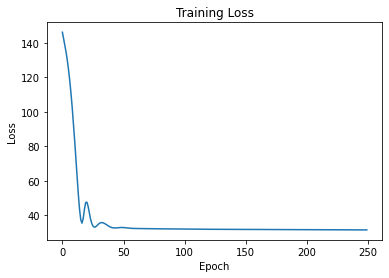

tensor([[1.1942, 0.2588]], grad_fn=<StackBackward>) tensor([[0.8208, 0.3077]], grad_fn=<UnsqueezeBackward0>)
Predicted parameters:  tensor([3.1618e+02, 4.0279e+02, 3.1997e+02, 2.8310e+02, 7.4057e+00, 1.1285e+01,
        1.3633e+01, 2.0400e-06], grad_fn=<AddBackward0>)


In [24]:
# Plot the loss
plt.plot(loss_array)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

print(predicted_2d_points_tensor, target_2d_points_tensor)

print("Predicted parameters: ", predicted_parameters_best)
